## Loading the data

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set(context='talk', style='whitegrid', palette='tab20')

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv("sampleSubmission.csv")

In [4]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [6]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## First look at data

In [7]:
from tkit import *

In [8]:
feat_info(train)

,type,n unique,n null,n non-null,0,1,2,10883,10884,10885
datetime,object,10886,0,10886,2011-01-01 00:00:00,2011-01-01 01:00:00,2011-01-01 02:00:00,2012-12-19 21:00:00,2012-12-19 22:00:00,2012-12-19 23:00:00
season,int64,4,0,10886,1,1,1,4,4,4
holiday,int64,2,0,10886,0,0,0,0,0,0
workingday,int64,2,0,10886,0,0,0,1,1,1
weather,int64,4,0,10886,1,1,1,1,1,1
temp,float64,49,0,10886,9.84,9.02,9.02,13.94,13.94,13.12
atemp,float64,60,0,10886,14.395,13.635,13.635,15.91,17.425,16.665
humidity,int64,89,0,10886,81,80,80,61,61,66
windspeed,float64,28,0,10886,0,0,0,15.0013,6.0032,8.9981
casual,int64,309,0,10886,3,8,5,4,12,4


## Feature engineering

In [13]:
# combaning together
train['source'] = 'train'
test['source'] = 'test'

data = pd.concat([train, test], axis=0)

In [14]:
data.head()

,atemp,casual,count,datetime,holiday,humidity,registered,season,source,temp,weather,windspeed,workingday
0,14.395,3.0,16.0,2011-01-01 00:00:00,0,81,13.0,1,train,9.84,1,0.0,0
1,13.635,8.0,40.0,2011-01-01 01:00:00,0,80,32.0,1,train,9.02,1,0.0,0
2,13.635,5.0,32.0,2011-01-01 02:00:00,0,80,27.0,1,train,9.02,1,0.0,0
3,14.395,3.0,13.0,2011-01-01 03:00:00,0,75,10.0,1,train,9.84,1,0.0,0
4,14.395,0.0,1.0,2011-01-01 04:00:00,0,75,1.0,1,train,9.84,1,0.0,0


In [15]:
data.tail()

,atemp,casual,count,datetime,holiday,humidity,registered,season,source,temp,weather,windspeed,workingday
6488,12.880,NaN,NaN,2012-12-31 19:00:00,0,60,NaN,1,test,10.66,2,11.0014,1
6489,12.880,NaN,NaN,2012-12-31 20:00:00,0,60,NaN,1,test,10.66,2,11.0014,1
6490,12.880,NaN,NaN,2012-12-31 21:00:00,0,60,NaN,1,test,10.66,1,11.0014,1
6491,13.635,NaN,NaN,2012-12-31 22:00:00,0,56,NaN,1,test,10.66,1,8.9981,1
6492,13.635,NaN,NaN,2012-12-31 23:00:00,0,65,NaN,1,test,10.66,1,8.9981,1


In [18]:
# converting datetime
data['datetime'] = pd.to_datetime(data['datetime'])

In [25]:
# creating year, month, weekday, hour features

data['yr']  = data['datetime'].dt.year
data['mnth']  = data['datetime'].dt.month
data['hr']  = data['datetime'].dt.hour
data['weekday'] = data['datetime'].dt.weekday


In [28]:
# creating 'time of day' feature

def assign_label(hour):
    if hour in np.arange(6,12):
        return 1
    elif hour in np.arange(12,18):
        return 2
    elif hour in np.arange(18,24):
        return 3
    elif hour in np.arange(0,6):
        return 4
    
data['time_of_day'] = data['hr'].apply(assign_label)    

In [29]:
data.head()

,atemp,casual,count,datetime,holiday,humidity,registered,season,source,temp,weather,windspeed,workingday,yr,mnth,hr,weekday,time_of_day
0,14.395,3.0,16.0,2011-01-01 00:00:00,0,81,13.0,1,train,9.84,1,0.0,0,2011,1,0,5,4
1,13.635,8.0,40.0,2011-01-01 01:00:00,0,80,32.0,1,train,9.02,1,0.0,0,2011,1,1,5,4
2,13.635,5.0,32.0,2011-01-01 02:00:00,0,80,27.0,1,train,9.02,1,0.0,0,2011,1,2,5,4
3,14.395,3.0,13.0,2011-01-01 03:00:00,0,75,10.0,1,train,9.84,1,0.0,0,2011,1,3,5,4
4,14.395,0.0,1.0,2011-01-01 04:00:00,0,75,1.0,1,train,9.84,1,0.0,0,2011,1,4,5,4


## Choosing a model

In [30]:
# splitting back to train and test

train = data[data.source == 'train']
test = data[data.source == 'test']

In [31]:
train.head()

,atemp,casual,count,datetime,holiday,humidity,registered,season,source,temp,weather,windspeed,workingday,yr,mnth,hr,weekday,time_of_day
0,14.395,3.0,16.0,2011-01-01 00:00:00,0,81,13.0,1,train,9.84,1,0.0,0,2011,1,0,5,4
1,13.635,8.0,40.0,2011-01-01 01:00:00,0,80,32.0,1,train,9.02,1,0.0,0,2011,1,1,5,4
2,13.635,5.0,32.0,2011-01-01 02:00:00,0,80,27.0,1,train,9.02,1,0.0,0,2011,1,2,5,4
3,14.395,3.0,13.0,2011-01-01 03:00:00,0,75,10.0,1,train,9.84,1,0.0,0,2011,1,3,5,4
4,14.395,0.0,1.0,2011-01-01 04:00:00,0,75,1.0,1,train,9.84,1,0.0,0,2011,1,4,5,4


In [32]:
test.head()

,atemp,casual,count,datetime,holiday,humidity,registered,season,source,temp,weather,windspeed,workingday,yr,mnth,hr,weekday,time_of_day
0,11.365,NaN,NaN,2011-01-20 00:00:00,0,56,NaN,1,test,10.66,1,26.0027,1,2011,1,0,3,4
1,13.635,NaN,NaN,2011-01-20 01:00:00,0,56,NaN,1,test,10.66,1,0.0000,1,2011,1,1,3,4
2,13.635,NaN,NaN,2011-01-20 02:00:00,0,56,NaN,1,test,10.66,1,0.0000,1,2011,1,2,3,4
3,12.880,NaN,NaN,2011-01-20 03:00:00,0,56,NaN,1,test,10.66,1,11.0014,1,2011,1,3,3,4
4,12.880,NaN,NaN,2011-01-20 04:00:00,0,56,NaN,1,test,10.66,1,11.0014,1,2011,1,4,3,4


In [34]:
# to choose a model we'll split train on sub_train and sub_test

sub_train = train.sample(frac=0.7, random_state=1)
sub_test = train.loc[~train.index.isin(sub_train.index)]

In [35]:
sub_train.head()

,atemp,casual,count,datetime,holiday,humidity,registered,season,source,temp,weather,windspeed,workingday,yr,mnth,hr,weekday,time_of_day
3709,33.335,101.0,308.0,2011-09-05 11:00:00,1,74,207.0,3,train,28.70,2,11.0014,0,2011,9,11,0,1
6741,21.210,6.0,14.0,2012-03-18 04:00:00,0,94,8.0,1,train,17.22,2,11.0014,0,2012,3,4,6,4
9848,31.060,193.0,539.0,2012-10-14 17:00:00,0,44,346.0,4,train,26.24,1,12.9980,0,2012,10,17,6,2
1410,33.335,47.0,143.0,2011-04-04 15:00:00,0,23,96.0,2,train,31.16,1,36.9974,1,2011,4,15,0,2
10672,20.455,0.0,1.0,2012-12-11 02:00:00,0,66,1.0,4,train,16.40,2,22.0028,1,2012,12,2,1,4


In [36]:
sub_test.head()

,atemp,casual,count,datetime,holiday,humidity,registered,season,source,temp,weather,windspeed,workingday,yr,mnth,hr,weekday,time_of_day
0,14.395,3.0,16.0,2011-01-01 00:00:00,0,81,13.0,1,train,9.84,1,0.0000,0,2011,1,0,5,4
2,13.635,5.0,32.0,2011-01-01 02:00:00,0,80,27.0,1,train,9.02,1,0.0000,0,2011,1,2,5,4
9,17.425,8.0,14.0,2011-01-01 09:00:00,0,76,6.0,1,train,13.12,1,0.0000,0,2011,1,9,5,1
14,22.725,35.0,106.0,2011-01-01 14:00:00,0,72,71.0,1,train,18.86,2,19.0012,0,2011,1,14,5,2
15,21.970,40.0,110.0,2011-01-01 15:00:00,0,77,70.0,1,train,18.04,2,19.9995,0,2011,1,15,5,2


In [123]:
# first set of features
features_1 = ['atemp', 'holiday', 'humidity', 'season', 'temp', 'weather', 'windspeed',
            'workingday', 'yr', 'mnth', 'hr', 'weekday', 'time_of_day']

target = 'count'

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error

In [42]:
def run_model(model, train, test):
    model.fit(train[features], train[target])

    train_pred = model.predict(train[features])
    test_pred = model.predict(test[features])
    # getting rid of negative predictions
    train_pred[train_pred < 0] = 0
    test_pred[test_pred < 0] = 0
    
    train_rmsle = np.sqrt(mean_squared_log_error(train[target], train_pred))
    test_rmsle = np.sqrt(mean_squared_log_error(test[target], test_pred))

    print('train error is: {} \n test error is: {}'.format(train_rmsle, test_rmsle))

In [64]:
features = features_1

model1 = RandomForestRegressor()
run_model(model1, sub_train, sub_test)

train error is: 0.17127799920270412 
 test error is: 0.35452489580453245


In [63]:
# tweaking models

model2 = RandomForestRegressor(min_samples_leaf=2)
run_model(model2, sub_train, sub_test)

train error is: 0.20267815953977794 
 test error is: 0.3444124866465869


In [73]:
model3 = RandomForestRegressor(max_depth=25)
run_model(model3, sub_train, sub_test)

train error is: 0.16398653665821872 
 test error is: 0.34719788638356497


In [134]:
model4 = RandomForestRegressor(min_samples_leaf=2, max_depth=16)
run_model(model4, sub_train, sub_test)

train error is: 0.20517927519674295 
 test error is: 0.34289014610195373


Model4 looks ok. Let's increase number of trees.

In [135]:
features = features_1
model4_1 = RandomForestRegressor(n_estimators=200, min_samples_leaf=2, max_depth=16)
run_model(model4_1, sub_train, sub_test)

train error is: 0.1970399460954467 
 test error is: 0.3367681595419403


In [133]:
# more trees and tweaking max_depth a little...

model4_2 = RandomForestRegressor(n_estimators=1000, min_samples_leaf=2, max_depth=16)
run_model(model4_2, sub_train, sub_test)

train error is: 0.19604384549295764 
 test error is: 0.3366186177648372


OK, let's stay with these parameters for now.

## Applying chosen model

In [136]:
# training a model with chosen parameters of global train dataset

prod_model = RandomForestRegressor(n_estimators=1000, min_samples_leaf=2, max_depth=16)
prod_model.fit(train[features], train[target])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [137]:
# predicting on test

test_pred = prod_model.predict(test[features])
test_pred

array([ 10.9315131 ,   5.47005815,   3.61384523, ..., 149.25671429,
       112.06224444,  62.60039643])

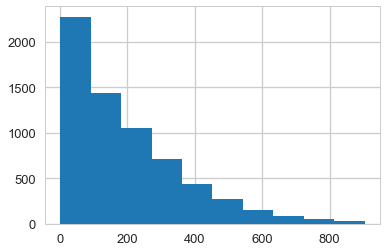

In [138]:
plt.hist(test_pred)
plt.show()

In [139]:
# creating submission
submission_4_2 = pd.concat([test['datetime'], pd.Series(test_pred, name='count')], axis=1)
submission_4_2.head()

,datetime,count
0,2011-01-20 00:00:00,10.931513
1,2011-01-20 01:00:00,5.470058
2,2011-01-20 02:00:00,3.613845
3,2011-01-20 03:00:00,3.526936
4,2011-01-20 04:00:00,3.022810


In [140]:
# let's compare to sample submission. Looks ok.
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [141]:
# to csv

submission_4_2.to_csv('submission_4_2_(16).csv', index=False)

And the final score is...

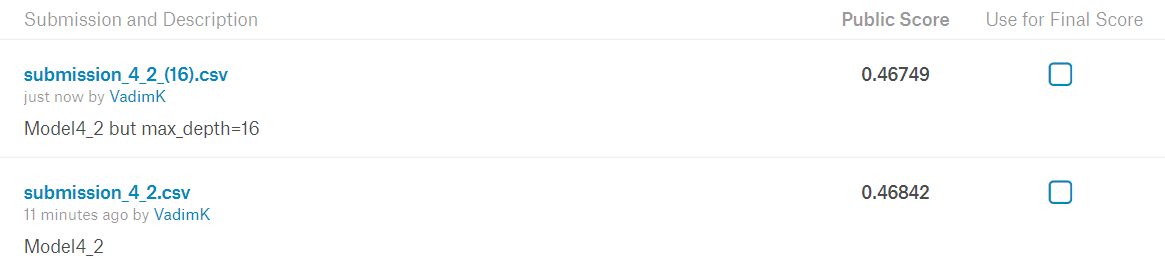  

Well not as good, but something.